In [3]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import os

In [4]:
import import_ipynb
import ML

importing Jupyter notebook from ML.ipynb


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
pickle_in = open(os.path.join(os.path.abspath('..'),"Data/features.pickle"),"rb")
df_features = pickle.load(pickle_in)

pickle_in = open(os.path.join(os.path.abspath('..'),"Data/labels.pickle"),"rb")
df_labels = pickle.load(pickle_in)

# Dimensionality Reduction

## PCA

In [7]:
from sklearn.decomposition import PCA
import ipywidgets as widgets
import plotly.express as xp
import numpy as np
import pandas as pd
%matplotlib nbagg

In [8]:
pca = PCA(.95)
x_pca = pca.fit_transform(df_features)
print(x_pca.shape)


(155, 110)


<IPython.core.display.Javascript object>


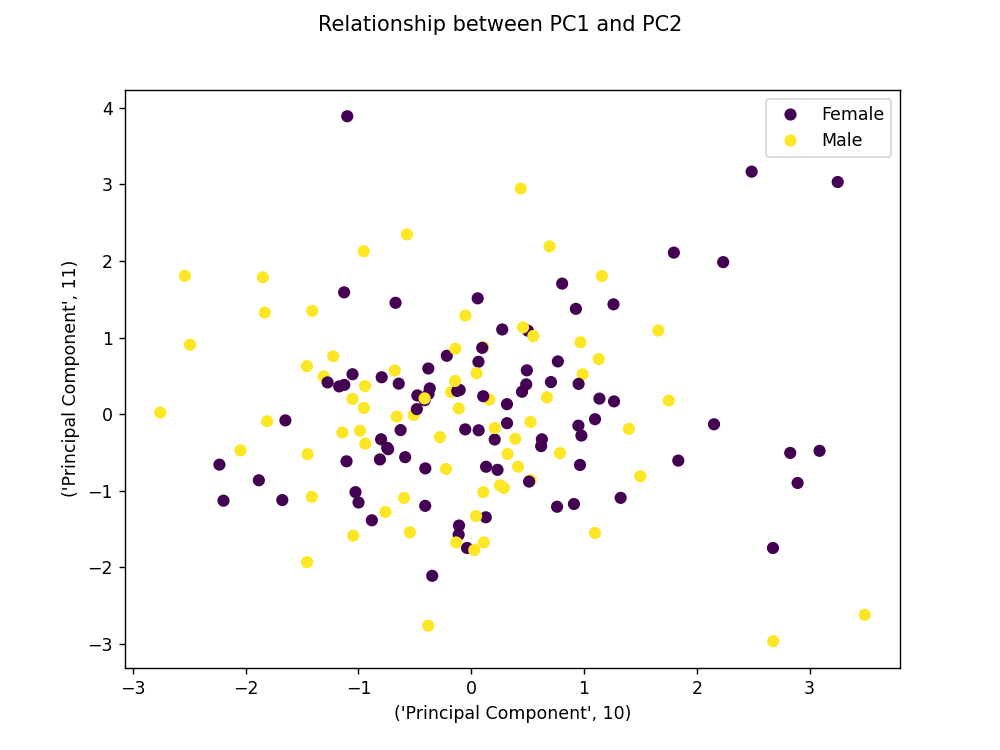

interactive(children=(IntSlider(value=1, description='PC #', layout=Layout(margin='0px 0px 0px 0px'), min=1), …

In [9]:
fig, ax = plt.subplots(1, figsize=(8,6))
fig.suptitle("Relationship between PC1 and PC2")

offset = '0px 0px 0px 0px'

pc1 = widgets.IntSlider(min = 1, max = 100, value = 1, description = "PC #")
pc2 = widgets.IntSlider(min = 1, max = 100, value = 1, description = "PC #")
pc1.layout.margin = offset
pc1.layout.margin = offset


def update_pcplot(pc1, pc2):
    ax.clear()
    
    img = ax.scatter(x_pca[:,pc1],x_pca[:,pc2],c = df_labels['Gender'])
    ax.set(xlabel = ('Principal Component', pc1))
    
    ax.set(ylabel = ('Principal Component', pc2))
   # ax.legend()
    ax.legend(handles=img.legend_elements()[0], labels=['Female','Male'])#*img.legend_elements())
    
    
widgets.interactive(update_pcplot, pc1 = pc1, pc2 = pc2)

In [1]:
fig = xp.line(np.cumsum(pca.explained_variance_ratio_))
fig.show()

NameError: name 'xp' is not defined

<IPython.core.display.Javascript object>


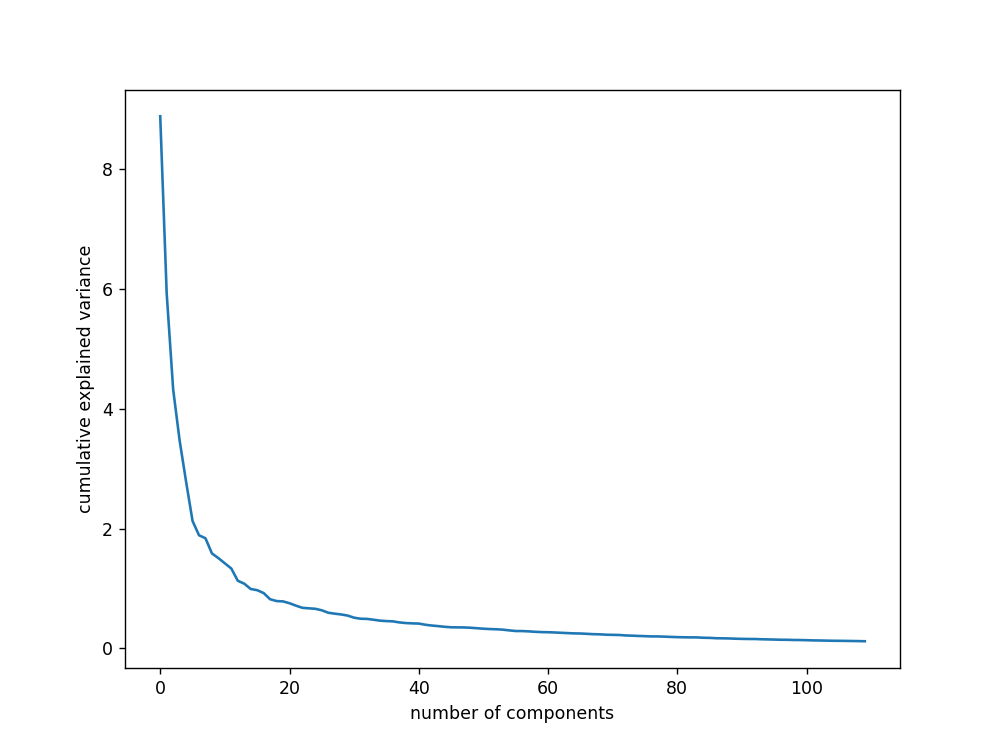

In [9]:
# Scree Plot
fig, ax = plt.subplots(1, figsize = (8,6))
ax.plot(pca.explained_variance_)
ax.set(xlabel = 'number of components')
ax.set(ylabel = 'cumulative explained variance')
fig.show()

In [11]:
df_pca = pd.DataFrame(x_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,0.499468,-1.932007,-0.638695,-0.739813,-0.260938,0.789944,-0.616664,-0.725113,0.706112,1.143246,...,0.460711,0.354897,0.322977,0.487043,-0.052798,0.049646,-0.173234,-0.308832,-0.251095,-0.591646
1,-2.656508,0.587487,-0.594614,-2.009832,-0.863339,-2.473234,-2.009449,0.231360,0.443728,-0.554525,...,-0.323467,-0.161361,0.220460,-0.296745,-0.012080,-0.352408,-0.644955,-0.818518,-0.020614,-0.041330
2,5.616071,0.797907,-0.091949,2.370490,-1.172154,0.123195,-0.944412,-0.854296,-0.029572,-0.879494,...,-0.544850,0.493727,-0.981990,-0.033955,0.316036,0.029557,-0.329831,-0.334854,-0.409377,-0.004114
3,0.239110,-2.351353,1.667328,-0.304280,0.476661,1.190021,-1.699979,-0.920833,0.178604,1.529532,...,-0.197294,-0.398485,0.188178,-0.401728,-0.114872,0.085508,-0.199558,0.266476,-0.085671,-0.353037
4,-1.283492,-4.608540,1.065526,-0.767118,-1.802775,0.056570,0.534454,0.455645,1.099662,-0.158440,...,0.058338,0.000775,-0.302650,-0.812515,-0.722556,0.208493,-0.098239,-0.104477,0.306988,-0.067244


# Train/Test Sets

Split the sample to training/validation with a 70/30 ratio, and 
stratify by df_labels, and also shuffle the data.

In [12]:
train_test = ML.train_test()
X_train, X_test, y_train, y_test = train_test.train_test_sets(df_pca, df_labels) 

training: 108 testing: 47


<IPython.core.display.Javascript object>


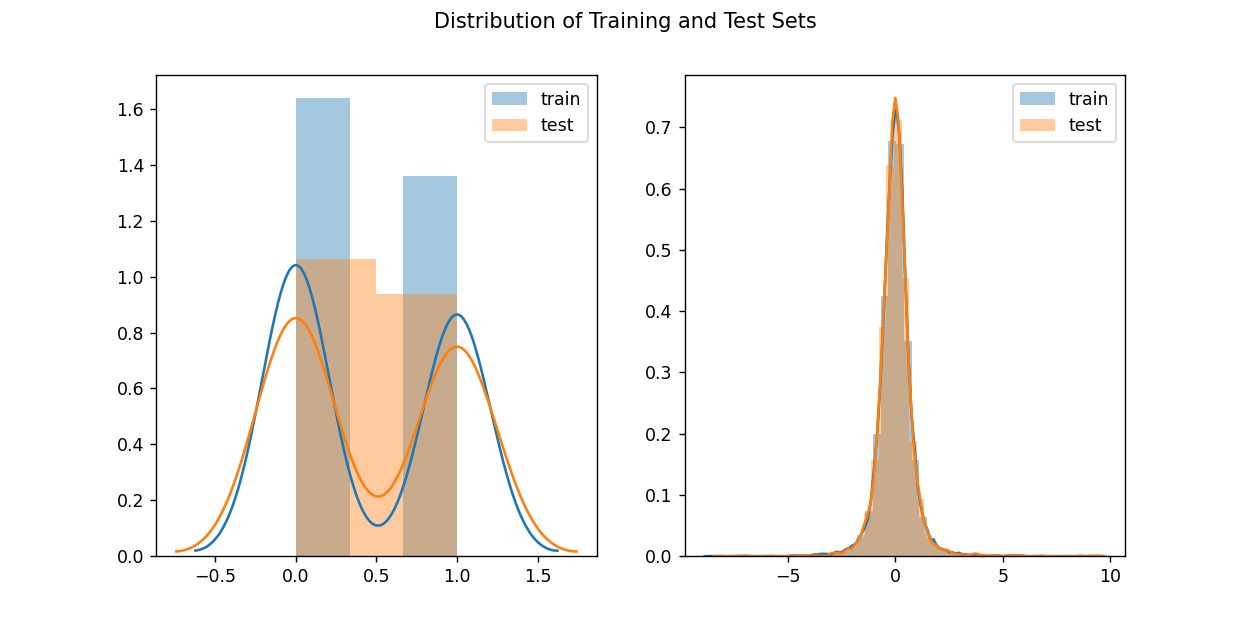

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle("Distribution of Training and Test Sets")

sns.distplot(y_train,label='train', ax = ax[0])
sns.distplot(y_test,label='test', ax = ax[0])
ax[0].legend()
sns.distplot(X_train,label='train', ax = ax[1])
sns.distplot(X_test,label='test', ax = ax[1])
ax[1].legend()


# Classification Models and Metrics Evaluation

Logistic Regression


Accuracy of Logistic Regression: 0.5863636363636363
Area Under Curve of Logistic Regression: 0.6155
f1 score of Logistic Regression: 0.5163636363636364
Confusion_matrix [[38 21]
 [24 25]]


<IPython.core.display.Javascript object>


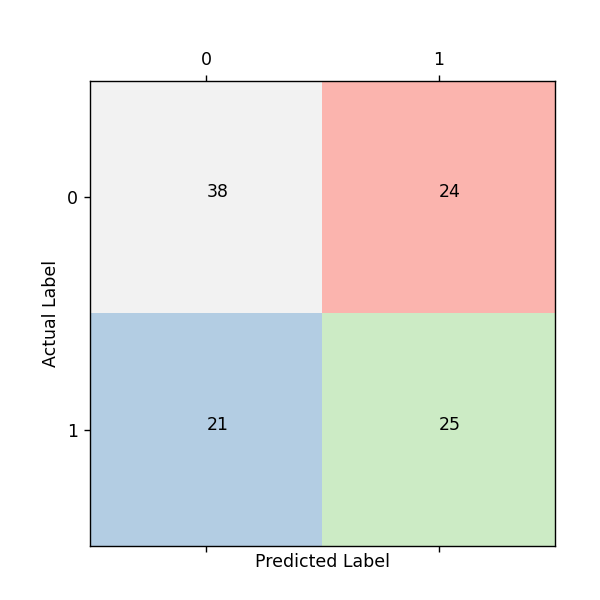

True Negative =  38
False Negative =  21
False Positive =  24
True Positive =  25


K-Nearest Neighbors


Accuracy of K-Nearest Neighbors: 0.5118181818181818
Area Under Curve of K-Nearest Neighbors: 0.49016666666666675
f1 score of K-Nearest Neighbors: 0.4735997335997336
Confusion_matrix [[32 27]
 [26 23]]


<IPython.core.display.Javascript object>


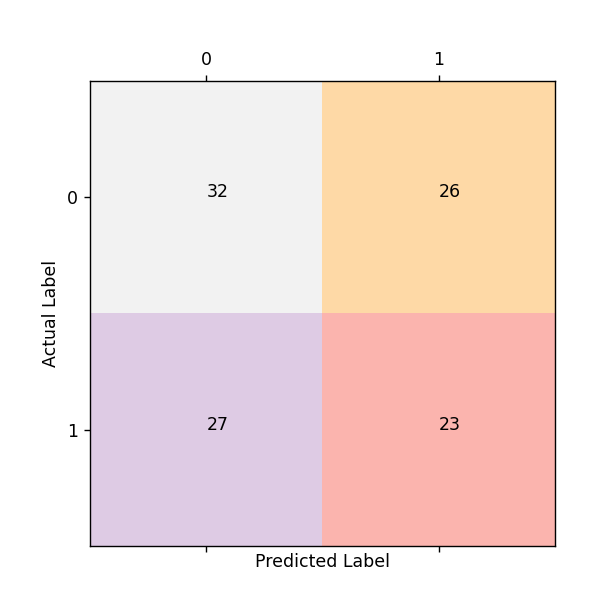

True Negative =  32
False Negative =  27
False Positive =  26
True Positive =  23


Multilayer Perceptron


Accuracy of Multilayer Perceptron: 0.6027272727272727
Area Under Curve of Multilayer Perceptron: 0.5933333333333334
f1 score of Multilayer Perceptron: 0.47248196248196245
Confusion_matrix [[45 14]
 [29 20]]


<IPython.core.display.Javascript object>


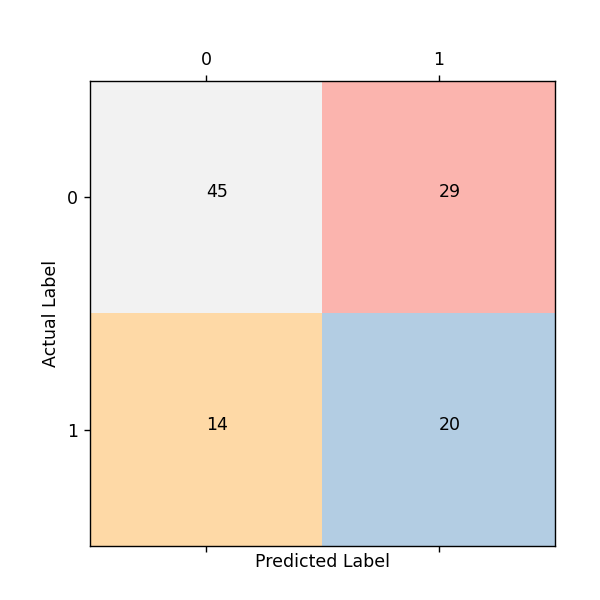

True Negative =  45
False Negative =  14
False Positive =  29
True Positive =  20


Gaussian Naive Bayes


Accuracy of Gaussian Naive Bayes: 0.4718181818181818
Area Under Curve of Gaussian Naive Bayes: 0.4878333333333333
f1 score of Gaussian Naive Bayes: 0.32062937062937064
Confusion_matrix [[35 24]
 [33 16]]


<IPython.core.display.Javascript object>


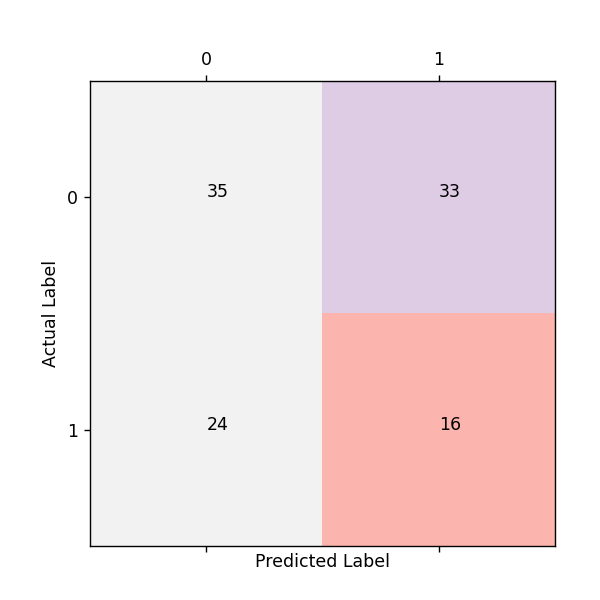

True Negative =  35
False Negative =  24
False Positive =  33
True Positive =  16


Decision Tree


Accuracy of Decision Tree: 0.5327272727272727
Area Under Curve of Decision Tree: 0.5503333333333333
f1 score of Decision Tree: 0.48612665112665115
Confusion_matrix [[31 28]
 [24 25]]


<IPython.core.display.Javascript object>


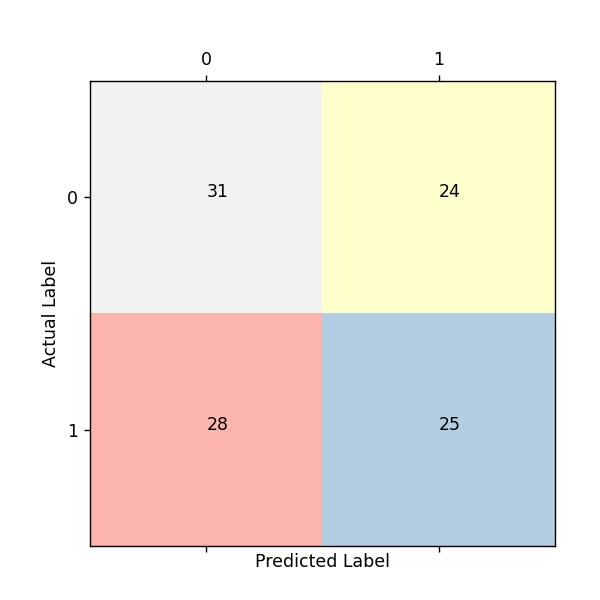

True Negative =  31
False Negative =  28
False Positive =  24
True Positive =  25


Random Forest


Accuracy of Random Forest: 0.51
Area Under Curve of Random Forest: 0.5003333333333333
f1 score of Random Forest: 0.3546825396825397
Confusion_matrix [[33 26]
 [31 18]]


<IPython.core.display.Javascript object>


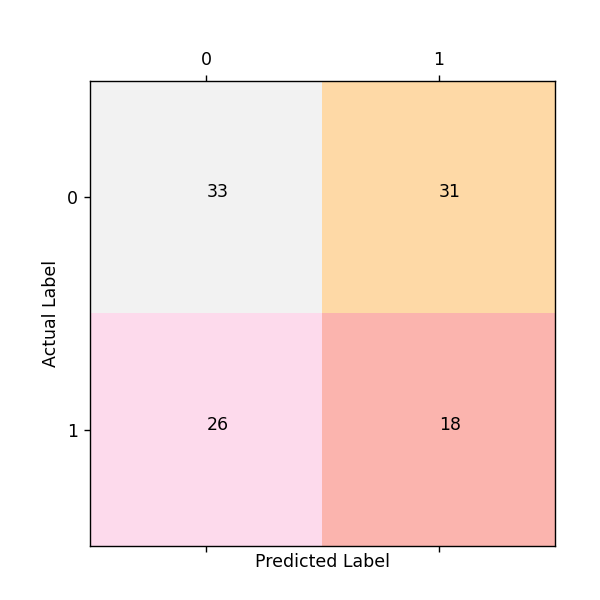

True Negative =  33
False Negative =  26
False Positive =  31
True Positive =  18




In [14]:

metrics = ML.ML_metrics()

# Names of Classifiers

clf_names = ['Logistic Regression', 
             'K-Nearest Neighbors', 
             'Multilayer Perceptron', 
             'Gaussian Naive Bayes', 
             'Decision Tree', 
             'Random Forest']
        
# Classifiers Initiation

classifiers = [LogisticRegression(random_state = 0),
               KNeighborsClassifier(n_neighbors = 3),
               MLPClassifier(hidden_layer_sizes=(2, 4), random_state=1),
               GaussianNB(),
               DecisionTreeClassifier(max_depth = 3),
               RandomForestClassifier(max_depth = 5, n_estimators = 10, max_features = 1)]


y_pred, acc, roc_auc, f1 = metrics.metrics(X_train, y_train, clf_names, classifiers)